In [1]:
# Initialize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy



In [2]:
# Select data
data = pd.read_pickle('data.pkl')
#data = pd.read_pickle('TEST_ASH_PT_NX_01.pkl')

freqList = ['125','250','500','1k','2k','4k','8k']
fbCols = ['fbr','ecr_b','ecr_f','ecr_m','dr_f','dr_b','dr_m','rms_f','rms_b','rms_m',"asmc","bsmc_f","bsmc_b","bsmc_m","fes_f","fes_b","fes_m","ms_b","ms_f","ms_m"]
params = ["asmc","bsmc_m","dr_b","dr_f","dr_m","fbr","rms_b","rms_f","rms_m","ecr_b","ecr_f","ecr_m"]#,"ms_f","ms_b","ms_m"]
output_prefix = 'delta' #@param ['delta','post']
freqList = ['125','250','500','1k','2k','4k','8k']

fbDict = {
    '125' : '0',
    '250' : '1',
    '500' : '2',
    '1k' : '3',
    '2k' : '4',
    '4k' : '5',
    '8k' : '6',
    'broad' : 'broad'
}

In [3]:

fbr_cols = [col for col in data.columns if 'fbr' in col]
snr_cols = [col.replace('fbr','snr') for col in fbr_cols]
rename_dict = dict(zip(fbr_cols, snr_cols))

data.rename(columns=rename_dict,inplace=True)


In [187]:
data.loc[0]

post_dr_m                                                  15.571894
post_dr_f                                                  15.626815
post_dr_b                                                  15.460537
post_dr_fb_m       [1.6529343144060356, 1.8620876222023064, 3.344...
post_dr_fb_f       [1.6296392713455106, 1.738031544094131, 3.2122...
                                         ...                        
delta_asmc                                                      -0.0
delta_asmc_fb      [-1.346700528870315e-13, 3.126388037344441e-13...
delta_bsmc_fb_m    [4.440892098500626e-16, -3.219646771412954e-15...
delta_bsmc_fb_f    [1.8318679906315083e-14, -1.3322676295501878e-...
delta_bsmc_fb_b    [1.6897594434794883e-13, 3.9968028886505635e-1...
Name: 0, Length: 68, dtype: object

{'hello': 2}

In [53]:
c = [col for col in list(data.columns) if 'fb' in col]
c = [col for col in c if 'rms' not in col]
c_delta = [col for col in c if 'delta' in col]
c_ecr = [col for col in c if 'ecr' in col]
c = [*c_delta,*c_ecr]

d = data.loc[0]
def parse_raw_data_to_factors(d,columns=c,fbDict = fbDict):
    d_ = {}
    for col in columns:
        for fb_item, fb_val in fbDict.items():
            if fb_item == 'broad':
                break
            col_name_new = (col.replace('_fb',f'_{fb_item}Hz'))

            d_[col_name_new] = d[col][int(fb_val)]

    return pd.Series(d_).to_frame().T

d = parse_raw_data_to_factors(d)

fa.transform(d)

array([[-0.00988261, -0.04950554,  0.70950905]])

In [4]:
# Grab the columns we need
# Only take the filterbank entries
# Only take the delta features
# Also include the ECR
# Add the lists together
# Remove the delta_fbr features that was included due "fb" included
c = [col for col in list(data.columns) if 'fb' in col]
c = [col for col in c if 'rms' not in col]
c_delta = [col for col in c if 'delta' in col]
c_ecr = [col for col in c if 'ecr' in col]
c = [*c_delta,*c_ecr]


Xcolumns = c
dfX = data[Xcolumns]



In [21]:
col = Xcolumns[0]
q  = dfX[col]

df_ = pd.DataFrame()
for col in Xcolumns:
    for fb_item, fb_val in fbDict.items():
        if fb_item == 'broad':
            break
        col_name_new = (col.replace('_fb',f'_{fb_item}Hz'))

        df_[col_name_new] = dfX[col].apply(lambda x:x[int(fb_val)])


    

In [22]:
Xcolumns

['delta_dr_fb_m',
 'delta_dr_fb_f',
 'delta_dr_fb_b',
 'delta_snr_fb',
 'delta_asmc_fb',
 'delta_bsmc_fb_m',
 'delta_bsmc_fb_f',
 'delta_bsmc_fb_b',
 'ecr_fb_m',
 'ecr_fb_f',
 'ecr_fb_b']

In [23]:
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt

In [24]:
nFactors = 3
scaler = StandardScaler()
fa = FactorAnalysis(nFactors,rotation='varimax')

In [25]:
df_

,delta_dr_125Hz_m,delta_dr_250Hz_m,delta_dr_500Hz_m,delta_dr_1kHz_m,delta_dr_2kHz_m,delta_dr_4kHz_m,delta_dr_8kHz_m,delta_dr_125Hz_f,delta_dr_250Hz_f,delta_dr_500Hz_f,...,ecr_2kHz_f,ecr_4kHz_f,ecr_8kHz_f,ecr_125Hz_b,ecr_250Hz_b,ecr_500Hz_b,ecr_1kHz_b,ecr_2kHz_b,ecr_4kHz_b,ecr_8kHz_b
0,-3.552714e-15,0.000000,0.000000,0.000000,3.552714e-15,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-6.324582e-02,-0.576039,-0.166584,-2.525937,-1.167997e-01,-0.384462,-1.638002,-0.039704,-0.340075,-0.044224,...,1.038115,1.417173,1.708081,1.021033,1.267761,0.904487,1.425164,0.992690,1.249074,1.971031
2,-5.653956e-02,-0.594732,0.143957,-2.038798,2.506830e-02,-0.040811,-1.874402,-0.039713,-0.378110,0.136704,...,0.993871,1.031084,1.901722,1.010885,1.353504,0.913444,1.304484,1.625900,1.057539,1.959420
3,-6.324522e-02,-0.576027,-0.166583,-2.525937,-1.167997e-01,-0.384462,-1.638002,-0.039707,-0.340056,-0.044222,...,1.038115,1.417173,1.708081,1.021033,1.267744,0.904485,1.425164,0.992690,1.249074,1.971031
4,-2.151273e-02,-0.438946,-0.174239,-2.545735,-1.211722e-01,-0.383361,-1.635576,-0.028628,-0.294232,-0.072528,...,1.039568,1.415910,1.705831,1.000019,1.001513,0.987048,1.132745,1.081452,0.997570,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-3.448922e-01,0.750260,0.682663,0.687513,4.851019e-01,0.719925,2.822064,0.880084,-0.179675,-0.004653,...,0.905940,0.900375,0.798664,1.415754,0.683649,0.724477,0.716959,0.642524,0.567304,0.560973
156,-1.971156e-01,-0.035961,-1.159477,-0.266991,-9.427663e-01,-0.109485,-1.319866,0.738590,-0.550715,-1.429469,...,2.284750,1.017321,1.307294,1.203348,0.962453,1.250327,0.934052,1.175249,1.218793,1.149156
157,-3.270786e-01,-0.020943,-0.925351,0.537539,-3.368737e-02,0.136261,-0.884692,0.182557,-0.774589,-1.363437,...,1.135398,1.011666,1.220994,1.388979,1.277962,1.163343,0.743816,0.629165,0.858827,1.130918
158,-3.337476e-01,-0.126232,-0.856258,0.361296,-4.542621e-01,0.500223,-0.502507,0.206007,-0.857747,-1.247746,...,1.491672,0.925672,1.195825,1.398480,1.400377,1.126420,0.816804,0.687442,0.677568,0.969731


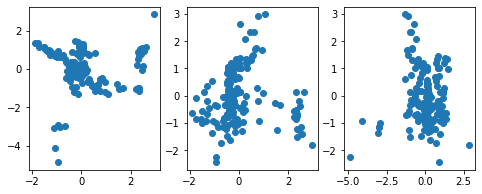

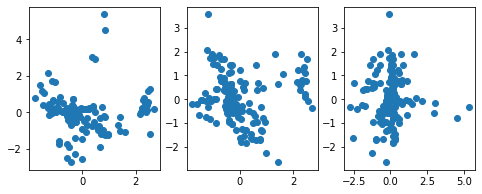

In [26]:
df_std = (df_-df_.mean())/df_.std()
Xfa = fa.fit_transform(df_)

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(Xfa[:,0],Xfa[:,1],'o')
plt.subplot(132)
plt.plot(Xfa[:,0],Xfa[:,2],'o')
plt.subplot(133)
plt.plot(Xfa[:,1],Xfa[:,2],'o')
plt.show()

df_std = (df_-df_.mean())/df_.std()
Xfa = fa.fit_transform(df_std)

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(Xfa[:,0],Xfa[:,1],'o')
plt.subplot(132)
plt.plot(Xfa[:,0],Xfa[:,2],'o')
plt.subplot(133)
plt.plot(Xfa[:,1],Xfa[:,2],'o')
plt.show()

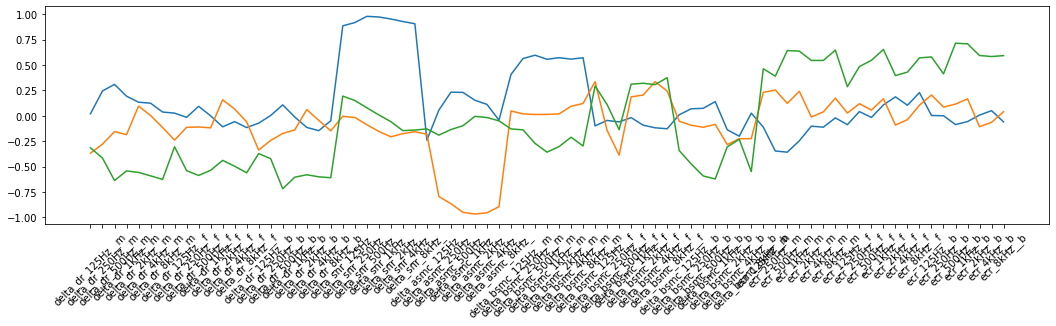

In [11]:
plt.figure(figsize=(18,4))
plt.plot(df_.columns,fa.components_.T)
plt.xticks(rotation=45)
plt.show()

In [145]:
df_.columns

Index(['delta_dr_125Hz_m', 'delta_dr_250Hz_m', 'delta_dr_500Hz_m',
       'delta_dr_1kHz_m', 'delta_dr_2kHz_m', 'delta_dr_4kHz_m',
       'delta_dr_8kHz_m', 'delta_dr_125Hz_f', 'delta_dr_250Hz_f',
       'delta_dr_500Hz_f', 'delta_dr_1kHz_f', 'delta_dr_2kHz_f',
       'delta_dr_4kHz_f', 'delta_dr_8kHz_f', 'delta_dr_125Hz_b',
       'delta_dr_250Hz_b', 'delta_dr_500Hz_b', 'delta_dr_1kHz_b',
       'delta_dr_2kHz_b', 'delta_dr_4kHz_b', 'delta_dr_8kHz_b', 'delta_fbr_fb',
       'delta_asmc_fb', 'delta_bsmc_125Hz_m', 'delta_bsmc_250Hz_m',
       'delta_bsmc_500Hz_m', 'delta_bsmc_1kHz_m', 'delta_bsmc_2kHz_m',
       'delta_bsmc_4kHz_m', 'delta_bsmc_8kHz_m', 'delta_bsmc_125Hz_f',
       'delta_bsmc_250Hz_f', 'delta_bsmc_500Hz_f', 'delta_bsmc_1kHz_f',
       'delta_bsmc_2kHz_f', 'delta_bsmc_4kHz_f', 'delta_bsmc_8kHz_f',
       'delta_bsmc_125Hz_b', 'delta_bsmc_250Hz_b', 'delta_bsmc_500Hz_b',
       'delta_bsmc_1kHz_b', 'delta_bsmc_2kHz_b', 'delta_bsmc_4kHz_b',
       'delta_bsmc_8kHz_b', 'ecr